In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#Generating sample data
x= np.linspace(0,10,10) # x is an array of 10 equally spaced values between 0 and 10
y= np.sin(x)



In [28]:
#Define the terms
control_ponts = x
num_control_points = len(x)
degree= 1
k = 2 #order
n= num_control_points -1

In [29]:
#Compute the knot vector
def get_bspline_params(n, degree):
    num_knots = n + k
    knots = np.zeros(num_knots)
    for i in range(num_knots):
        if i < k:
            knots[i] = 0
        elif k <= i <= n:
            knots[i] = i - k + 1
        elif i > n:
            knots[i] = n - k + 2

    return x, knots



In [30]:
#Compute the B-spline basis functions
def bspline_basis(t, i, k, knots):
    if k == 0:
        if knots[i] <= t < knots[i+1]:
            return 1
        else:
            return 0
    else:
        w1 = 0 if knots[i+k] == knots[i] else (t - knots[i]) / (knots[i+k] - knots[i])
        w2 = 0 if knots[i+k+1] == knots[i+1] else (knots[i+k+1] - t) / (knots[i+k+1] - knots[i+1])
        return w1 * bspline_basis(t, i, k-1, knots) + w2 * bspline_basis(t, i+1, k-1, knots)


In [31]:
#Evaluate the BSpline basis functions
x_interpolated = np.linspace(x[0],x[-1],100)
y_interpolated = np.zeros_like(x_interpolated)
for i, x_val in enumerate(x_interpolated):
    for j in range(len(x)):
        y_interpolated[i] += y[j]* bspline_basis(X)

NameError: name 'X' is not defined

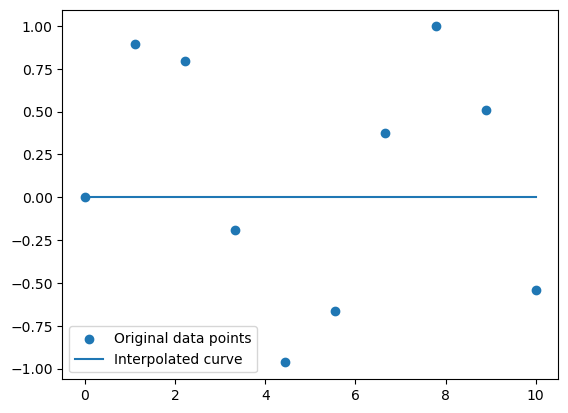

In [25]:
#plot the original data and the interpolated curve
plt.scatter(x,y, label="Original data points")
plt.plot(x_interpolated, y_interpolated, label="Interpolated curve")
plt.legend()
plt.show()
